# GP09 GeoPandas EXERCISE THREE ANSWERS
___

In [1]:
# Import libraries: Geopandas, Pandas, Matplotlip.pyplot and Contextily 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

## 1. Load Spatial data
* Load the file: localdata/Philadelphia/Neighborhoods_Philadelphia.shp
* Display the first 3 rows of the data.

In [4]:
gdfa = gpd.read_file("localdata/Philadelphia/Neighborhoods_Philadelphia.shp")
gdfa.head(3)

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."


* Load the file: localdata/swimming_pools.shp
* Display the first 3 rows of the data.

In [5]:
s = gpd.read_file("localdata/swimming_pools.shp")
s.head(3)

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)


___
## 2. Overlay Maps
* Create and overlay map of the above two datasets (each representing the point and the polygon).
* Use Matplotlib fig, ax = plt.subplots and pass each ax to these two plots.

<Axes: >

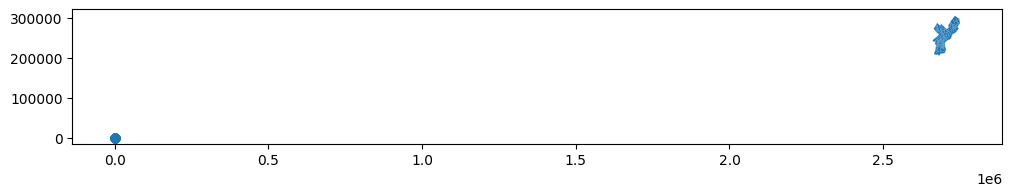

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
gdfa.plot(ax=ax)
s.plot(ax=ax)

* Run a CRS check for both datasets and notice their differences.
* Reproject the CRS of the swimming pool dataset (point) to the neighbourhood dataset (polygon).
* Plot and overlay the two datasets.

<Axes: >

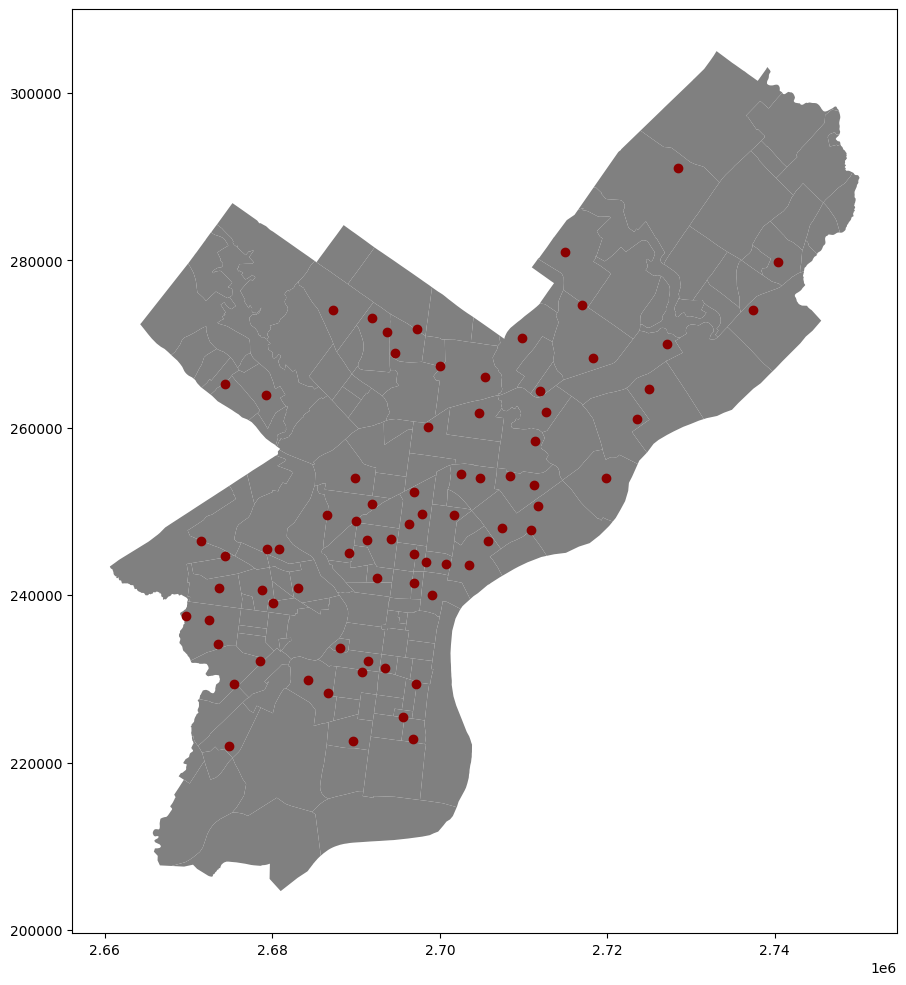

In [11]:
s = s.to_crs(gdfa.crs)
fig, ax = plt.subplots(figsize=(12,12))

gdfa.plot(ax=ax, color='grey')
s.plot(ax=ax, color='darkred')

___
## 3. Base Map with Contextily
* Plot the swimming dataset (point) with a base map via contextily while REPROJECTING the EPSG to 3857 for proper alignment.
* Use base map type: Stamen TonerLite (if available) or OpenStreetMap Mapnik.

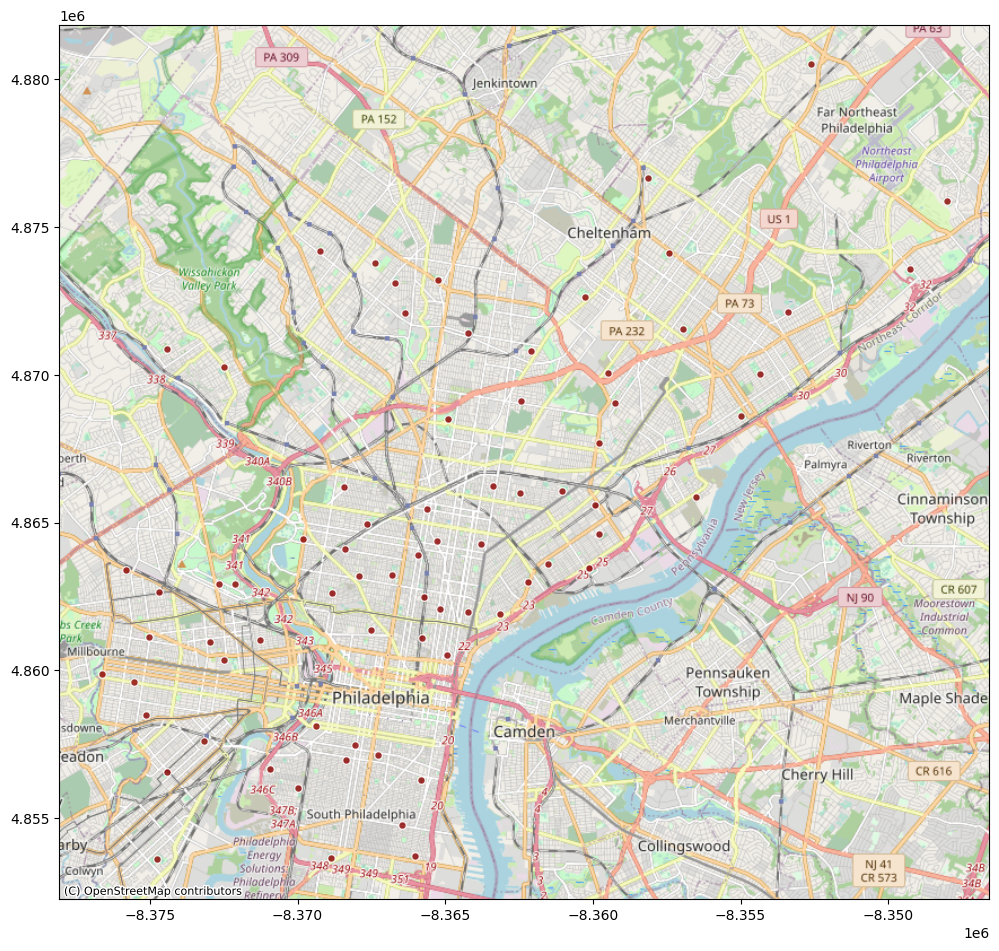

In [14]:
fig, ax = plt.subplots(figsize=(12, 12))
s.to_crs(epsg=3857).plot(ax = ax, figsize=(12,12), markersize=30, color="darkred", edgecolor="white", alpha=0.8, marker="o")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

___
## 4. Choropleth Map
* Load file from the crime counts dataset that was created and saved in GP06 EXERCISE 2 with the file name 'localdata/**xxx**.Geojson'.
* Display the first 5 rows of the data.

In [15]:
i = gpd.read_file("localdata/nc.Geojson")
i.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,COUNTS,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,279,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


* Create a choropleth map from the above dataset based on the column, COUNTS.
* Note: The COUNTS column contains raw data.

<Axes: >

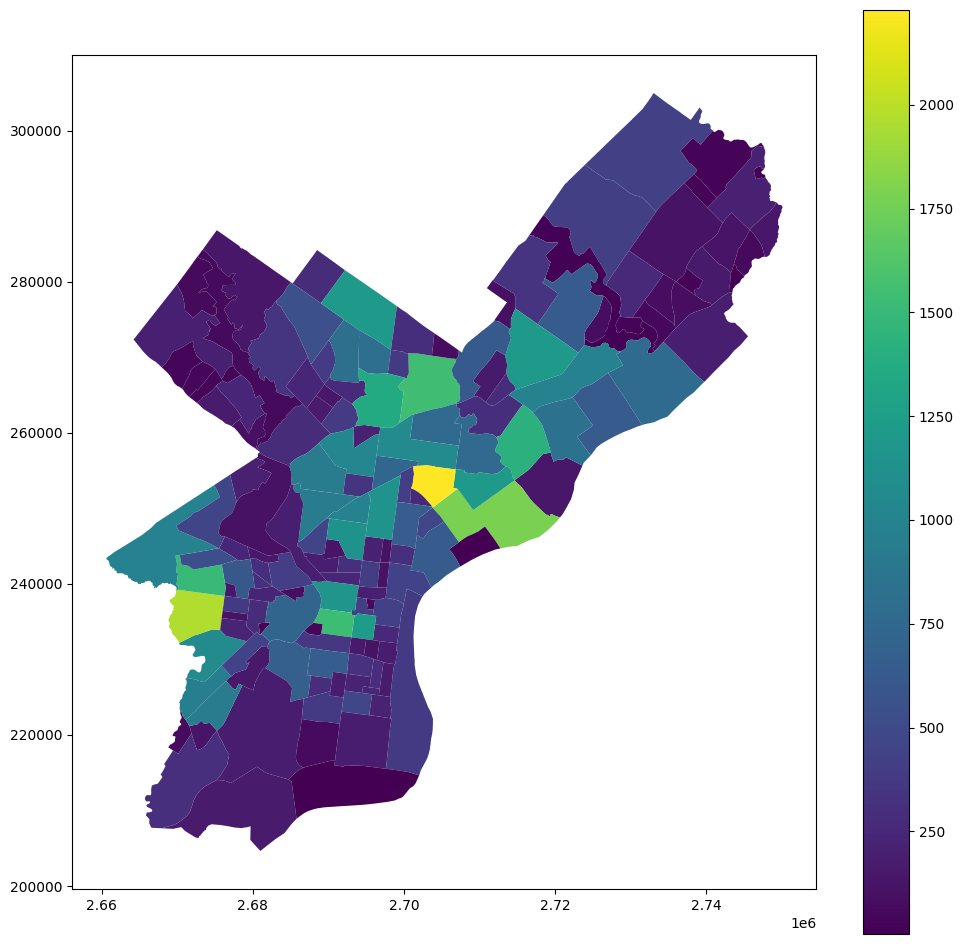

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))
i.plot(column="COUNTS", ax=ax, legend=True)

* Normalise the column data from the [COUNTS] with the [Shape_Area].
* Example: (COUNTS/Shape_Area)*100

In [17]:
i["CN"] = (i.COUNTS/i.Shape_Area)*100
i.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,COUNTS,geometry,CN
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",0.000318
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",0.000362
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",0.001130
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",0.000168
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,279,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",0.000688


* Create a choropleth map based on the normalised column and set the parameter, legend=True.

<Axes: >

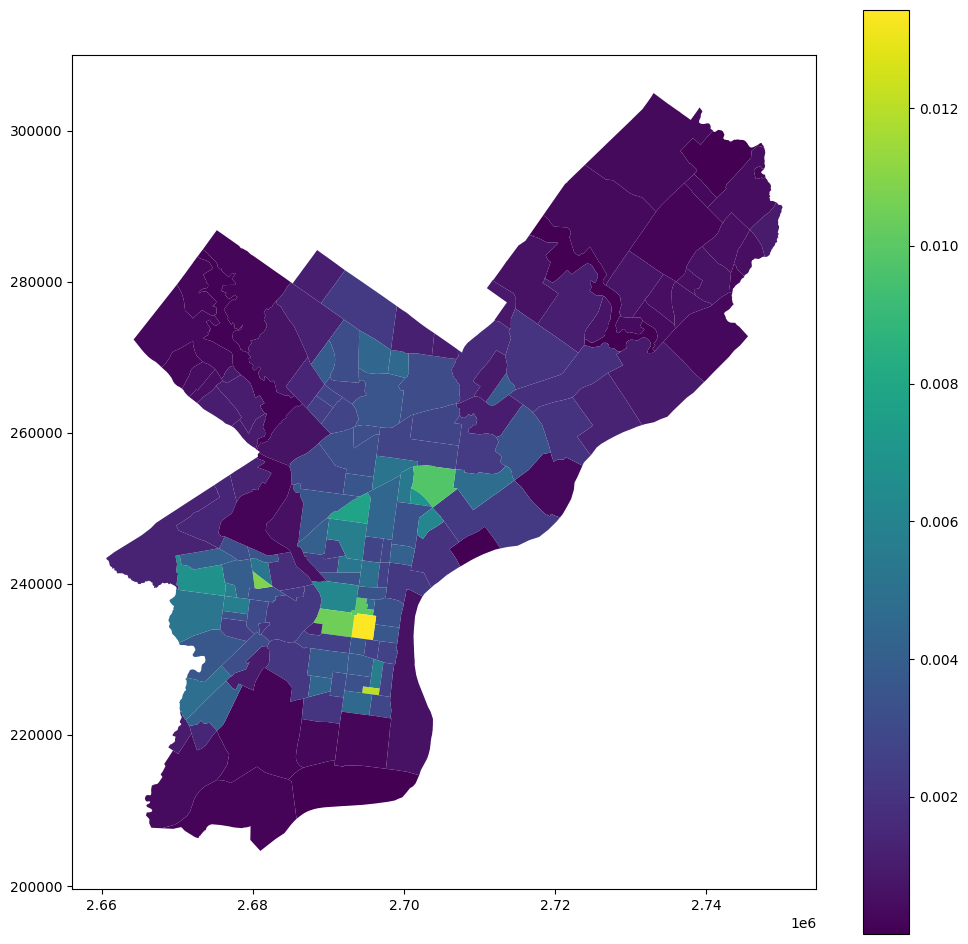

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
i.plot(column="CN", ax=ax, legend=True)

___